In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load training dataset
df = pd.read_csv('diabetes_train.csv')
df.head()

df_test = pd.read_csv('diabetes_test.csv')

# 2a)

In [7]:
# 1. Basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,3.812857,120.600000,68.914286,20.407143,78.624286,31.907714,0.475359,33.065714,0.344286
std,3.332865,31.467448,19.996525,16.033538,115.176907,7.875281,0.337224,11.675695,0.475475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,18.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.250000,36.525000,0.629250,40.000000,1.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


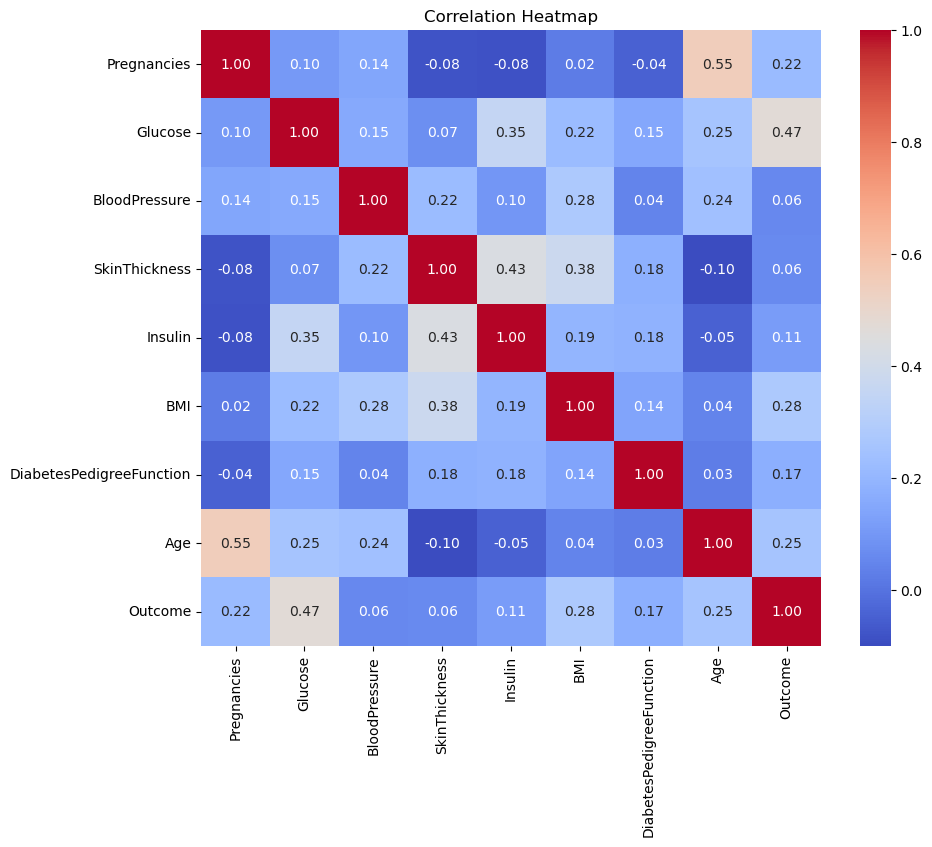

In [9]:
# 2. Correlation matrix to understand correlation between predictors and response
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# can be used for feature engineering later on

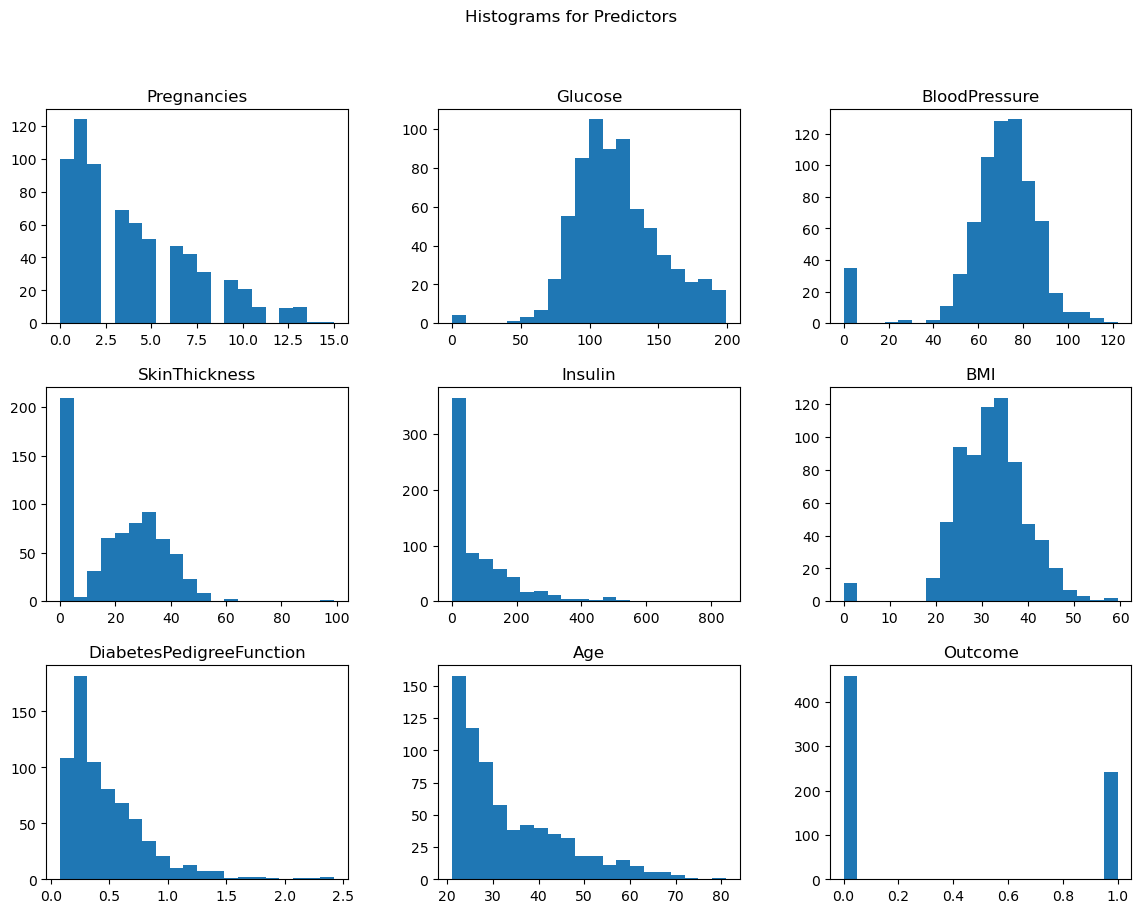

In [11]:
# 3. Histograms for each predictor to understand their distributions
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle('Histograms for Predictors')
plt.show()

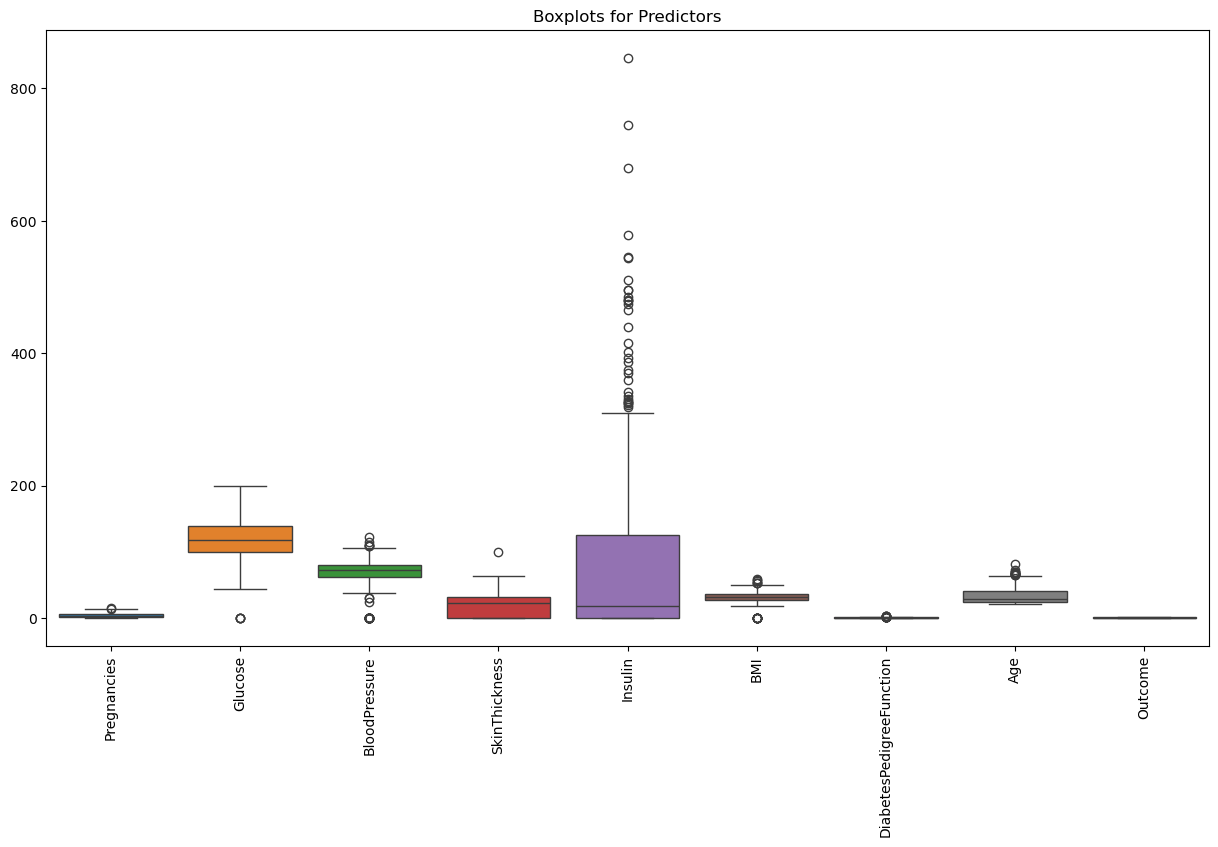

In [13]:
# 4. Boxplots to check for outliers which could also help to explain the outliers we see in the distribution above
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplots for Predictors")
plt.xticks(rotation=90)
plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

# Splitting the data into predictors and respons (outcome)
X_train = df.drop(columns=['Outcome'])
y_train = df['Outcome']
X_test = df_test.drop(columns=['Outcome'])
y_test = df_test['Outcome']

# Performing LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Creating Predictions
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

# Computing confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# 4. Computing accuracy and misclassification rate
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_misclassification_rate = 1 - train_accuracy
test_misclassification_rate = 1 - test_accuracy

#results
print("Training Confusion Matrix:\n", train_conf_matrix)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Training Misclassification Rate: {:.2f}%".format(train_misclassification_rate * 100))
print("\nTest Confusion Matrix:\n", test_conf_matrix)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Misclassification Rate: {:.2f}%".format(test_misclassification_rate * 100))

Training Confusion Matrix:
 [[405  54]
 [106 135]]
Training Accuracy: 77.14%
Training Misclassification Rate: 22.86%

Test Confusion Matrix:
 [[35  6]
 [10 17]]
Test Accuracy: 76.47%
Test Misclassification Rate: 23.53%


# 2c)

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 1. Fitting the QDA model with the data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

#Making predictions on the data
y_train_pred_qda = qda.predict(X_train)
y_test_pred_qda = qda.predict(X_test)

# Creating Confusion matrices
train_conf_matrix_qda = confusion_matrix(y_train, y_train_pred_qda)
test_conf_matrix_qda = confusion_matrix(y_test, y_test_pred_qda)

# 4. Misclassification rates
train_accuracy_qda = accuracy_score(y_train, y_train_pred_qda)
test_accuracy_qda = accuracy_score(y_test, y_test_pred_qda)
train_misclassification_rate_qda = 1 - train_accuracy_qda
test_misclassification_rate_qda = 1 - test_accuracy_qda

# Display the results
print("QDA Training Confusion Matrix:\n", train_conf_matrix_qda)
print("QDA Training Accuracy: {:.2f}%".format(train_accuracy_qda * 100))
print("QDA Training Misclassification Rate: {:.2f}%".format(train_misclassification_rate_qda * 100))

print("\nQDA Test Confusion Matrix:\n", test_conf_matrix_qda)
print("QDA Test Accuracy: {:.2f}%".format(test_accuracy_qda * 100))
print("QDA Test Misclassification Rate: {:.2f}%".format(test_misclassification_rate_qda * 100))

QDA Training Confusion Matrix:
 [[397  62]
 [ 99 142]]
QDA Training Accuracy: 77.00%
QDA Training Misclassification Rate: 23.00%

QDA Test Confusion Matrix:
 [[35  6]
 [12 15]]
QDA Test Accuracy: 73.53%
QDA Test Misclassification Rate: 26.47%


## 2d)

In [25]:
from sklearn.naive_bayes import GaussianNB

# 1. Perform Naive Bayes without scaling
nb = GaussianNB()
nb.fit(X_train, y_train)

# 2. Predictions
y_train_pred_nb = nb.predict(X_train)
y_test_pred_nb = nb.predict(X_test)

# 3. Confusion matrices
train_conf_matrix_nb = confusion_matrix(y_train, y_train_pred_nb)
test_conf_matrix_nb = confusion_matrix(y_test, y_test_pred_nb)

# 4. Misclassification rates
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
train_misclassification_rate_nb = 1 - train_accuracy_nb
test_misclassification_rate_nb = 1 - test_accuracy_nb

# Display the results
print("Naive Bayes Training Confusion Matrix:\n", train_conf_matrix_nb)
print("Naive Bayes Training Accuracy: {:.2f}%".format(train_accuracy_nb * 100))
print("Naive Bayes Training Misclassification Rate: {:.2f}%".format(train_misclassification_rate_nb * 100))

print("\nNaive Bayes Test Confusion Matrix:\n", test_conf_matrix_nb)
print("Naive Bayes Test Accuracy: {:.2f}%".format(test_accuracy_nb * 100))
print("Naive Bayes Test Misclassification Rate: {:.2f}%".format(test_misclassification_rate_nb * 100))

Naive Bayes Training Confusion Matrix:
 [[387  72]
 [ 95 146]]
Naive Bayes Training Accuracy: 76.14%
Naive Bayes Training Misclassification Rate: 23.86%

Naive Bayes Test Confusion Matrix:
 [[34  7]
 [ 8 19]]
Naive Bayes Test Accuracy: 77.94%
Naive Bayes Test Misclassification Rate: 22.06%


# 2e)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Define a range of K values to try
k_values = range(1, 11)

# Store accuracy and misclassification rates for each K
train_accuracies = []
test_accuracies = []
train_misclassification_rates = []
test_misclassification_rates = []

# Loop through different values of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions
    y_train_pred_knn = knn.predict(X_train)
    y_test_pred_knn = knn.predict(X_test)
    
    # Calculate accuracy and misclassification rates for training and test sets
    train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
    test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
    
    train_accuracies.append(train_accuracy_knn)
    test_accuracies.append(test_accuracy_knn)
    
    train_misclassification_rates.append(1 - train_accuracy_knn)
    test_misclassification_rates.append(1 - test_accuracy_knn)

# Find the best K (the one with the lowest test misclassification rate)
best_k = k_values[test_misclassification_rates.index(min(test_misclassification_rates))]

# Print results
print(f"The best K value is: {best_k}")
print(f"Best Test Misclassification Rate: {min(test_misclassification_rates):.2f}")
print(f"Best Test Accuracy: {max(test_accuracies) * 100:.2f}%")

# Confusion matrix and accuracy for the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_train_pred_best_knn = best_knn.predict(X_train)
y_test_pred_best_knn = best_knn.predict(X_test)

train_conf_matrix_knn = confusion_matrix(y_train, y_train_pred_best_knn)
test_conf_matrix_knn = confusion_matrix(y_test, y_test_pred_best_knn)

print("\nKNN (Best K) Training Confusion Matrix:\n", train_conf_matrix_knn)
print("\nKNN (Best K) Test Confusion Matrix:\n", test_conf_matrix_knn)

The best K value is: 4
Best Test Misclassification Rate: 0.24
Best Test Accuracy: 76.47%

KNN (Best K) Training Confusion Matrix:
 [[435  24]
 [102 139]]

KNN (Best K) Test Confusion Matrix:
 [[37  4]
 [12 15]]
